# DSCI100 Project Final Report

#### Jason Cai, Kaiwen Hu, Bao Nguyen, Shantelle Virginillo





# Introduction: 



A computer science research team led by Frank Wood is currently collecting data about how people play video games, specifically Minecraft. To do this, they set up a Minecraft server and meticulously record player actions and data, including their age, experience level, hours of play, whether the player is subscribed, and more. In general, there are three questions the team is hoping to answer:
 1. What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
2. We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
3. We are interested in demand forecasting, namely, what time windows are most likely to have a large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 


From broad question #1, we narrowed it down and decided to try and answer the question “Can the variables experience, age, subscribe, and gender predict played_hours in players.csv?”
To do so, we will be using the players.csv file only.


# Part1: Data Description


The "Players" dataset contains 7 variables and 196 observations:
 
- `experience` *(Character)*: How experienced the player is
- `hashedEmail` *(Character)*: The player's email hashed
- `name` *(Character)*: The name of the player
- `gender` *(Character)*: The gender of the player
- `played_hours` *(Double)*: How many hours the player played
- `Age` *(Double)*: The age of the player
- `subscribe` *(logical)*: If the player is subscribed


# Part 2: Methods & Results

In [74]:
library(tidyverse)
library(cowplot)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

### Loading, Wrangling, Cleaning and Description of Data:


First, we started with loading our data. We loaded our data from the url "https://raw.githubusercontent.com/JasonCai0522/DSCI100_Datasets/refs/heads/main/players.csv" to ensure that others can run our notebook even without the dataset downloaded on their device.

In [75]:
# Loading in the data
player_data <- read_csv("https://raw.githubusercontent.com/JasonCai0522/DSCI100_Datasets/refs/heads/main/players.csv", show_col_types = FALSE)

# Tidying the data
player_data_tidy <- player_data |> 
        mutate(experience = as_factor(experience), gender = as_factor(gender)) |>
        rename(age = Age) |>
        drop_na(age)
player_data_tidy



experience,subscribe,hashedEmail,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


Our next step is to summarize our data. To do this, we decided to summarize 5 important pieces of data to keep in mind while completing our analysis:
- The mean age of all participants
- The mean hours played of all participants
- How many people are subscribed and not subscribed
- The distribution of participants across genders
- The distribution of experience across all participants


In [76]:
age_hour_values <- summarize(player_data_tidy,
        mean_age = mean(age, na.rm = TRUE),
        mean_hours_played = mean(played_hours, na.rm = TRUE))

subs_values <- player_data_tidy|>
                group_by(subscribe)|>
        summarize(number_of_people = sum(n()))

gender_values <- player_data_tidy|>
                group_by(gender)|>
        summarize(number_of_people = sum(n()))

ex_values <- player_data_tidy|>
                group_by(experience)|>
        summarize(number_of_people = sum(n()))

age_hour_values
subs_values
gender_values
ex_values

mean_age,mean_hours_played
<dbl>,<dbl>
20.52062,5.904639


subscribe,number_of_people
<lgl>,<int>
FALSE,52
TRUE,142


gender,number_of_people
<fct>,<int>
Male,124
Female,37
Non-binary,15
Prefer not to say,11
Agender,2
Two-Spirited,5


experience,number_of_people
<fct>,<int>
Pro,13
Veteran,48
Amateur,63
Regular,35
Beginner,35


### Visualization and analyse
We decided to start by plotting point plots and looking for any obvious relationships between play time and other variables


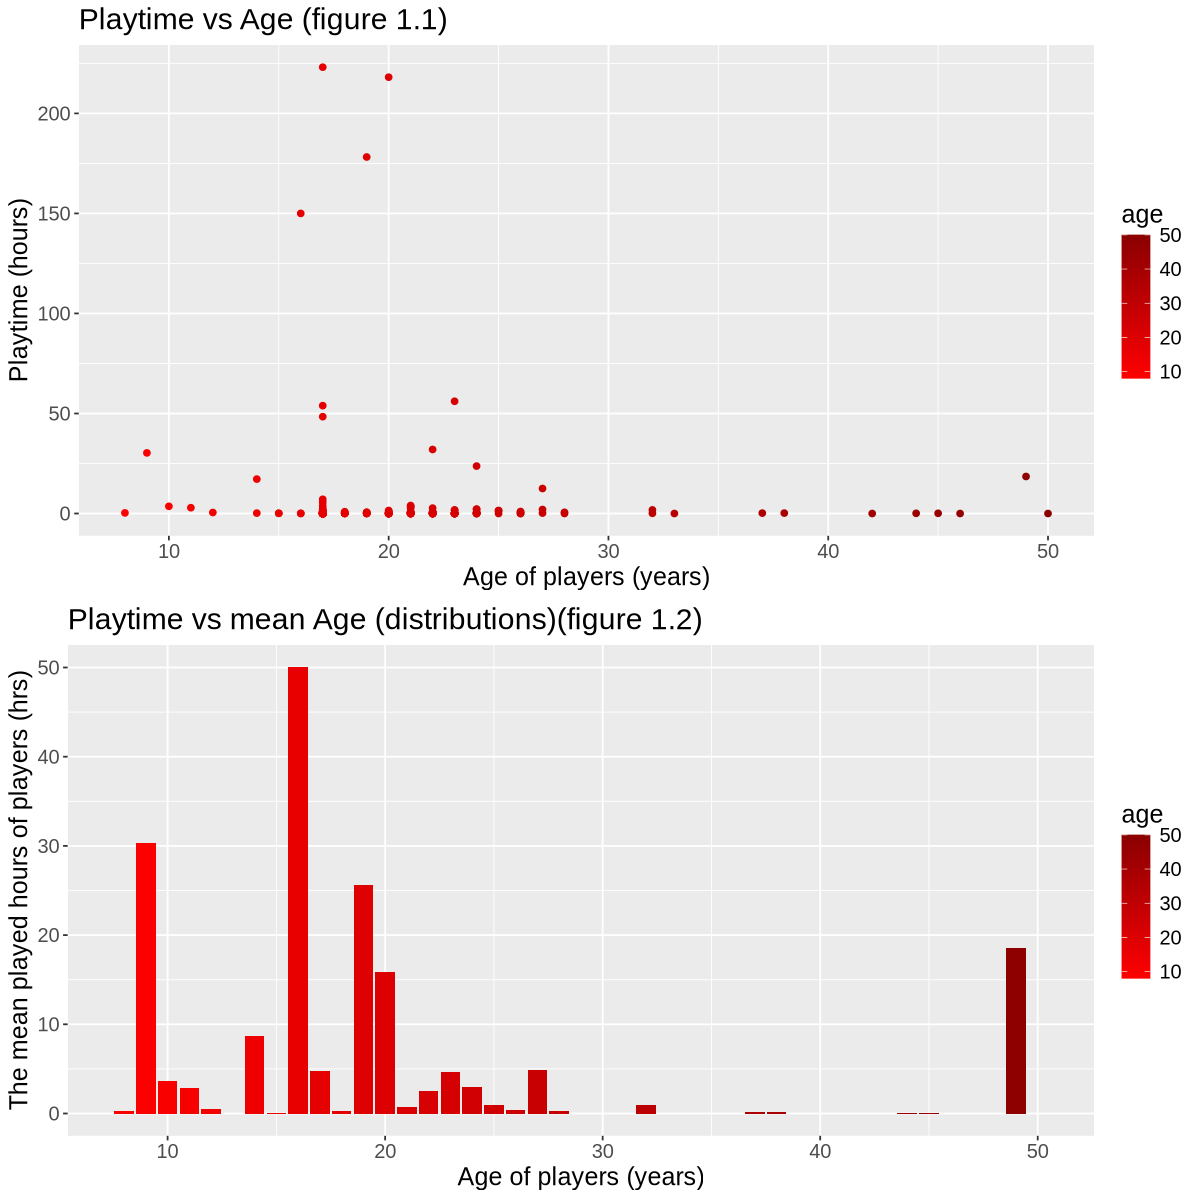

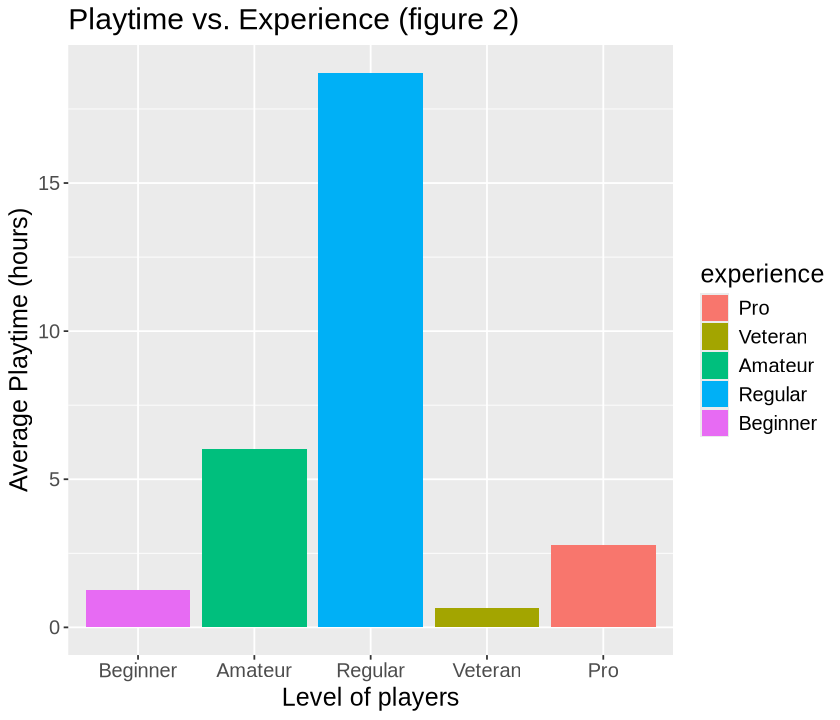

subscribe,avg_playtime
<lgl>,<dbl>
FALSE,0.5019231
TRUE,7.8830986


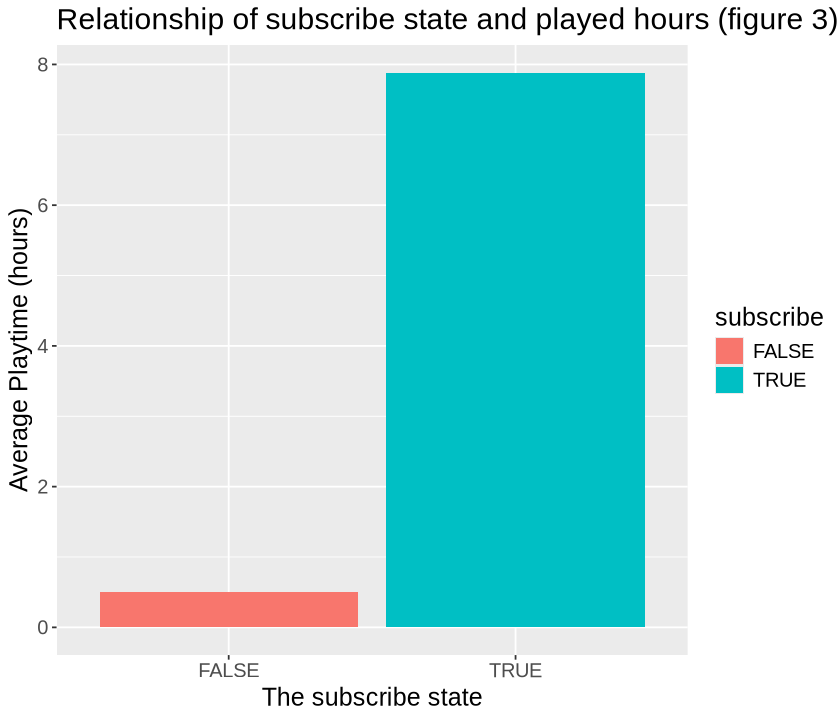

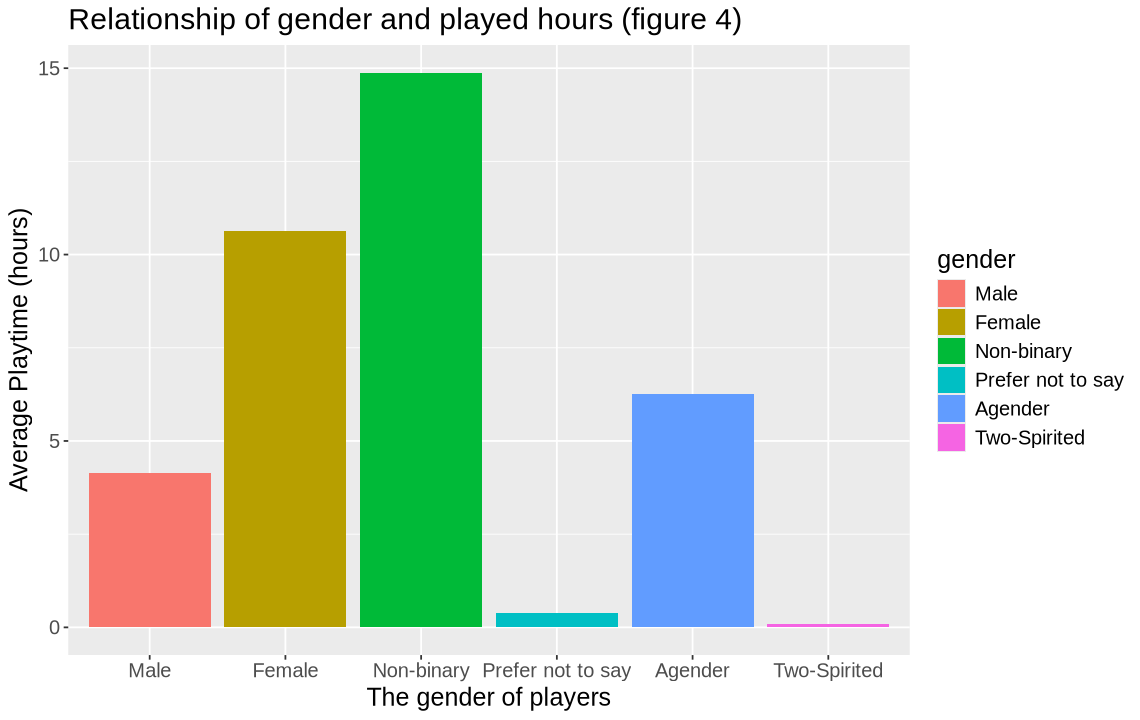

In [77]:
age_vs_playtime_with_experience <- player_data_tidy |>
        ggplot(aes(x = age, y = played_hours, color = age)) +
       scale_color_gradient(low = "red",  high = "darkred")+
        geom_point() + 
        labs(x = "Age of players (years)", y = "Playtime (hours)", title = "Playtime vs Age (figure 1.1)")+
        theme(text = element_text(size = 15))

Age_ph_hist_line_plot <- player_data_tidy|>
    group_by(age)|> 
     summarize(avg_playtime = mean(played_hours))|>  # Get the average time of play for each Age
    ggplot(aes(x = age, y = avg_playtime, fill = age)) +
       scale_fill_gradient(low = "red",  high = "darkred")+
       geom_bar(stat = "identity")+
       xlab("Age of players (years)") +
       ylab("The mean played hours of players (hrs)") +
        labs(title = "Playtime vs mean Age (distributions)(figure 1.2)")+
       theme(text = element_text(size = 15))

options(repr.plot.width = 10, repr.plot.height = 10) 
plot_grid(age_vs_playtime_with_experience, Age_ph_hist_line_plot, ncol = 1)

options(repr.plot.width = 7, repr.plot.height = 6) 
age_vs_playtime_with_experience <- player_data_tidy |>
        group_by(experience)|> 
        summarize(avg_playtime = mean(played_hours))|> # Get the average time of play for each Age
        ggplot(aes(x = experience, y = avg_playtime, fill = experience)) +
        geom_bar(stat = "identity", ) + 
        scale_x_discrete(limits = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))+  # Arrange the level of players
        labs(x = "Level of players", y = "Average Playtime (hours)", title = "Playtime vs. Experience (figure 2)")+
        theme(text = element_text(size = 15))
age_vs_playtime_with_experience

subs_ph_bar_mean <- player_data_tidy|>
    group_by(subscribe)|> 
    summarize(avg_playtime = mean(played_hours))

subs_ph_bar_plot <- subs_ph_bar_mean|>  # Get the average time based on if they subscribe the game-related news
    ggplot(aes(x = subscribe, 
               y = avg_playtime, 
               fill = subscribe)) + 
       geom_bar(stat = "identity")+
       xlab("The subscribe state") +
       ylab("Average Playtime (hours)") +
       labs(fill = "subscribe")+
       ggtitle("Relationship of subscribe state and played hours (figure 3)")+
       theme(text = element_text(size = 15))
subs_ph_bar_plot
subs_ph_bar_mean


gen_ph_bar_mean <- player_data_tidy|>
    group_by(gender)|> 
    summarize(avg_playtime = mean(played_hours))

gen_ph_bar_plot <- gen_ph_bar_mean|>  # Get the average time based on if they subscribe the game-related news
    ggplot(aes(x = gender, 
               y = avg_playtime, 
               fill = gender)) + 
       geom_bar(stat = "identity")+
       xlab("The gender of players") +
       ylab("Average Playtime (hours)") +
       labs(fill = "gender")+
       ggtitle("Relationship of gender and played hours (figure 4)")+
       theme(text = element_text(size = 15))
options(repr.plot.width = 9.5, repr.plot.height = 6) 
gen_ph_bar_plot

#### Figure 1 analyse


- From the “Playtime vs. Age” graph, we can see that there isn’t really any linear correlation we can observe. If we were to outline the shape of the distribution, we can see that the distribution is right-skewed (long right tail) with its peak around the 17-18 year old age mark, implying that the older the players are the lower their overall playtime.

- From the “Playtime vs mean Age (distributions)” we can see that the hours of play peaks at around age 18 and then drops off significantly after age 20. This could be indicative of many things: a change of lifestyle, less interest in gaming, and more. This helps the developers better know their demographic and how they may better reach their audience. From this graph alone, it is clear that at least some of our predictors can be used to predict the playing hours of different groups of players.

- This lack of a linear correlation and along with the relatively small size of the data leads us to utilise the KNN regression model as a method most appropriate to answer our question of predicting played_hours.


#### Figure 2 analyse




- From the “Playtime vs. Age Coloured by Experience” graph and the (insert mean playtime and Experience Level barchart title), we can see that as we move closer to the middle of the ordinal categorical variable Experience Level, the average playtime is a lot higher than if we were to compare it with the two polar Experience Level ends. 

- This is somewhat expected as with someone with prior experience playing/beating the game (multiple times), playing the game would become a lot more repetitive and as a consequence, more boring, making them less inclined to play the game. 

- This finding can help the stakeholders know who their main target audiences are and help developers make changes to the game that makes the game more approachable to newer players (beginners) or add updates to give players with more experience more in-game content.

#### Figure 3 analyse




- From the “Relationship of Subscribe State and Played Hours” graph, we can see that a player being subscribed or not generally has a big influence on the mean hours of play that a player has. For players subscribed to the newsletter, the mean playtime was 	7.8830986 hours and for players not subscribed to the newsletter, the mean playtime was 0.5019231 hours. This is important for answering our specific question and intuitively it makes sense.
  
-  Predicting hours of play is also useful for the developers, since they can use this information to increase sales, including sales of the newsletter. From this graph we can see that people subscribed to the newsletter will likely be much more active players than those who are not subscribed.

#### Figure 4 analyse

- From the “Relationship of gender and played hours” graph, there are significant differences in the average playtime of different gender groups.
    - "Non-binary" group has the highest average playing time, which is close to or over 15 hours;
    - The average length of "Prefer not to say" and "Female" is also relatively high, around 10 to 12 hours;
    - "Male" is relatively low, around 4 hours;
    - "Agender" and "Two-spirited" had the lowest average length, just under one hour.

- Players who self-identify as different genders do differ in their average playing time, which may be a useful predictor.

### Perform a KNN-Regression

We use a KNN model to make predictions about play time. To clean the data, we first decided to change the variables __experience__, and __gender__ from *character* type to *factor* type to more accurately reflect the data being represented. We also decided to drop all columns where the age is na to prevent issues in our model. Afterwards, we decided to select only the columns that were prevalent to our focus question (__experience__, __gender__, and __subscribe__, __played_hours__, __age__) to cut out unnecessary info in our dataframe.

Afterwards, since __experience__ and __gender__ are considered factor types, we decided to employ dummy coding to allow the KNN-Regression model to take them in. This means we added another column for each category in __experience__ and __gender__ with a binary value (0 or 1) to indicate whether it is part of that category. This allows us to use factor variables without directionality in our model. Finally, we changed __subscribe__ to be a binary value, with 0 representing false and 1 representing true. 


In [78]:
# Selecting the relevent columns
player_data_tidy <- player_data_tidy |>
        select(experience, subscribe, played_hours, gender, age)

# Dummy coding experience and gender

# Experience values
pro_vals = ifelse(player_data_tidy$experience == 'Pro', 1, 0)
veteran_vals = ifelse(player_data_tidy$experience == 'Veteran', 1, 0)
regular_vals = ifelse(player_data_tidy$experience == 'Regular', 1, 0)
amateur_vals = ifelse(player_data_tidy$experience == 'Amateur', 1, 0)
beginner_vals = ifelse(player_data_tidy$experience == 'Beginner', 1, 0)

# Gender values
male_vals = ifelse(player_data_tidy$gender == 'Male', 1, 0)
female_vals = ifelse(player_data_tidy$gender == 'Female', 1, 0)
nb_vals = ifelse(player_data_tidy$gender == 'Non-binary', 1, 0)
agender_vals = ifelse(player_data_tidy$gender == 'Agender', 1, 0)
ts_vals = ifelse(player_data_tidy$gender == 'Two-Spirited', 1, 0)

player_data_dummy <- player_data_tidy |>
    mutate(pro = pro_vals, veteran = veteran_vals, regular = regular_vals, amateur = amateur_vals, beginner = beginner_vals) |>
    mutate(male = male_vals, female = female_vals, nb = nb_vals, agender = agender_vals, two_spirited = ts_vals) |>
    mutate(subscribe = ifelse(subscribe == TRUE, 1, 0)) |>
    select(-experience, -gender)

player_data_dummy
     

subscribe,played_hours,age,pro,veteran,regular,amateur,beginner,male,female,nb,agender,two_spirited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30.3,9,1,0,0,0,0,1,0,0,0,0
1,3.8,17,0,1,0,0,0,1,0,0,0,0
0,0.0,17,0,1,0,0,0,1,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0.3,22,0,1,0,0,0,1,0,0,0,0
0,0.0,17,0,0,0,1,0,0,0,0,0,0
0,2.3,17,0,0,0,1,0,1,0,0,0,0


To analyze our data, we decided to train a KNN-Regression model. Our reasoning for this is that we are attempting to predict a numerical value, which necessitates the use of either linear regression or KNN-Regression. From our visualization, we did not see a clear linear relationship. Additionally, the dataset is not that large, with only 194 observations, which is good for KNN-Regressions. 

To train our model, we first split our dataset into a test set and a train set. We decided to use a 75-25 train-test split for our model.


In [79]:
# Splitting data into train and test
set.seed(1234)
players_split <- initial_split(player_data_dummy, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

Next, we created our recipe and model. Due to KNN-Regression calculating error from euclidean distance, scaling and centering is necessary to prevent variables with larger ranges contributing more to the distance calculation and over-influencing the prediction. 

In [80]:
# Creating recipe and spec
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ ., data = player_data_dummy) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

Afterwards, we trained our model on k values from 1 to 100. We utilized 5-fold cross validation to provide a better estimate of model accuracy. Then, we collected the metrics for each k value.

We found the k-val with the lowest RMSE value next, which turned out to be 3.

In [81]:
set.seed(6666)

players_vfold = vfold_cv(players_training, v = 5, strata = played_hours)
players_workflow <- workflow() |>
        add_recipe(players_recipe) |>
        add_model(players_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

players_results <- players_workflow |>
        tune_grid(resamples = players_vfold, grid = gridvals) |>
        collect_metrics()

players_results

→ A | warning: !  The following column has zero variance so scaling cannot be used: agender.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,36.400585178,5,9.066841228,Preprocessor1_Model001
1,rsq,standard,0.007635382,5,0.005025401,Preprocessor1_Model001
2,rmse,standard,34.863428617,5,6.548463953,Preprocessor1_Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
99,rsq,standard,0.01926089,5,0.01064491,Preprocessor1_Model099
100,rmse,standard,27.73160501,5,8.57048636,Preprocessor1_Model100
100,rsq,standard,0.03878372,5,0.02969245,Preprocessor1_Model100


In [82]:
players_rmse <- players_results |>
        filter(.metric == "rmse") 

players_min <- players_rmse |> 
        slice_min(std_err)
players_min
     

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,34.66455,5,6.189736,Preprocessor1_Model004


To get a better sense of how our model performed across different k-vals, we decided to graph k-val vs RMSE.

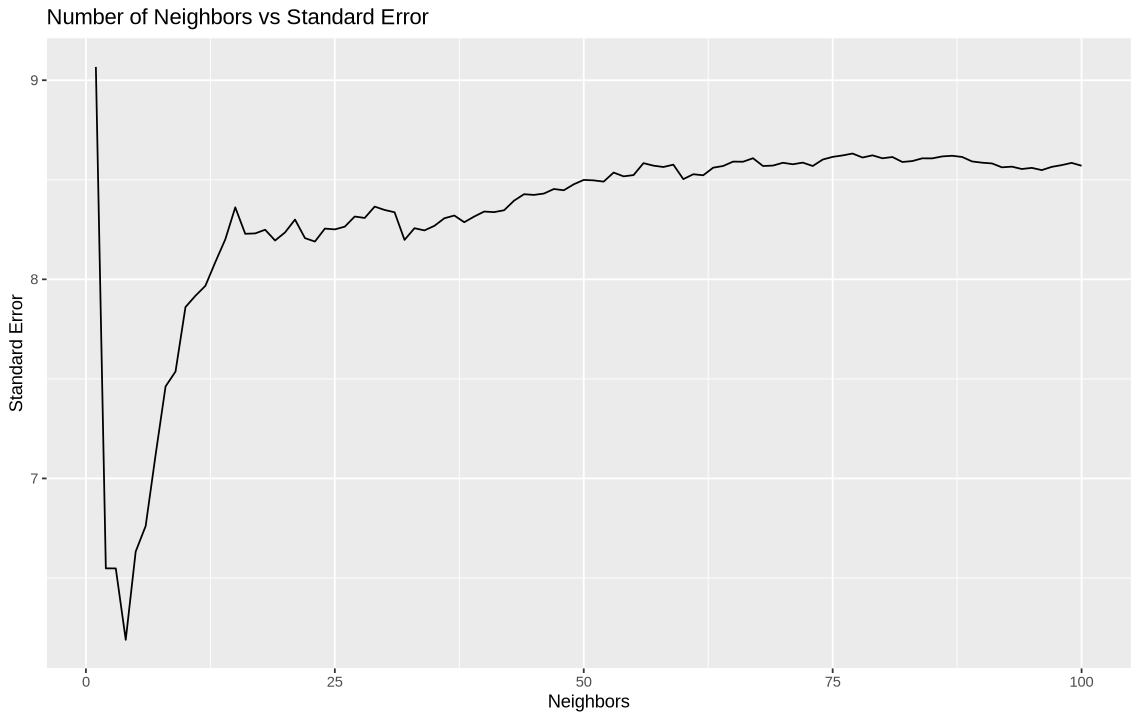

In [83]:
players_rmse |> 
    ggplot(aes(x = neighbors, y = std_err)) +
    geom_line() +
    labs(x = "Neighbors", y = "Standard Error", title = "Number of Neighbors vs Standard Error")

Continuing, we decided to make a prediction on our test set. We did this using the k-val with the minimum RMSE we got from previous steps. After making the prediction, we look at the metrics again to see our RMSPE value.

Note that due to our KNN-Regression model using many predictor variables, it is difficult to visualize what the prediction line actually looks like.

In [84]:
k_min <- players_min |>
         pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)

players_summary <- players_best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = played_hours, estimate = .pred)

players_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,19.794334442
rsq,standard,0.002717764
mae,standard,8.390306122


Our model does not seem ideal, with an RMSE as high as 19.79, and given that the average playtime of all players is only 5.9 hours, the accuracy of our model's predictions is relatively low.

# Part 3: Conclusion

Based on visual analysis, we believe that the variables subscription status, experience, gender, and age have a significant impact on prediction results, and we have used them as predictors to build a KNN regression model. However, the model's performance did not meet expectations, with a Root Mean Squared Prediction Error (RMSPE) as high as 19.79, which indicates a huge deviation between predicted and actual values.

This error may stem from sample size insufficiency, weak correlation between some predictors and the target variable, or outliers interfering with the model. To optimize the model in the future, multiple options are possible. First, expand the data scale to increase sample size and diversity, ensuring sufficient data; second, re-evaluate the effectiveness of each variable as a predictor to avoid interference with prediction results; and finally, detect and adjust outliers to reduce noise interference.
